In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Classical models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Neural network (Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2

from itertools import product

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Dataset

## Clean-up Dataset

In [2]:
# data_path = 'data/data_3dcp_clean.csv'
# data = pd.read_csv(data_path)

# # Define features and target
# X = data[['extrusion', 'layer_height', 'layer_width']]
# y = data['speed']

# # Reserve an independent test set (20%) and use 80% for training/cross-validation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print("Training set shape:", X_train.shape)
# print("Test set shape:", X_test.shape)

## Load Dataset

In [3]:
data_path = 'data/data_3dcp_clean.csv'
data = pd.read_csv(data_path)

print(data.head())
print("\nData summary:")
print(data.describe())

   speed  extrusion  layer_height  layer_width
0     80          5             5        52.05
1     80          5             5        50.50
2     80          5             5        57.78
3    100          5             5        57.16
4    100          5             5        48.00

Data summary:
            speed  extrusion  layer_height  layer_width
count  318.000000  318.00000    318.000000   318.000000
mean   172.327044    7.50000      9.339623    39.935849
std     96.756190    2.50394      3.566104    24.910630
min     20.000000    5.00000      5.000000    13.390000
25%    100.000000    5.00000      5.000000    22.717500
50%    160.000000    7.50000      8.000000    32.370000
75%    240.000000   10.00000     12.000000    48.007500
max    360.000000   10.00000     15.000000   142.500000


## Train-Test Split

In [4]:
# Define features and target
X = data[['extrusion', 'layer_height', 'layer_width']]
y = data['speed']

# Reserve an independent test set (20%) and use 80% for training/cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (254, 3)
Test set shape: (64, 3)


# Classical Models

## Linear Regression

In [5]:
# Build the pipeline for Linear Regression
lr_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('lr', LinearRegression())
])

# Perform 5-fold cross validation
cv_results_lr = cross_validate(lr_pipeline, X_train, y_train, cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)

# Convert negative MSE to positive values for reporting
train_mse_lr = -np.mean(cv_results_lr['train_score'])
val_mse_lr   = -np.mean(cv_results_lr['test_score'])

print("Linear Regression 5-Fold CV Results:")
print(f"Average Training MSE: {train_mse_lr:.4f}")
print(f"Average Validation MSE: {val_mse_lr:.4f}")

Linear Regression 5-Fold CV Results:
Average Training MSE: 2672.6512
Average Validation MSE: 2796.0170


## Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import numpy as np

# Build the pipeline for Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('ridge', Ridge(random_state=42))
])

# Perform 5-fold cross validation
cv_results_ridge = cross_validate(ridge_pipeline, X_train, y_train, cv=5,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True)

# Convert negative MSE to positive values for reporting
train_mse_ridge = -np.mean(cv_results_ridge['train_score'])
val_mse_ridge   = -np.mean(cv_results_ridge['test_score'])

print("Ridge Regression 5-Fold CV Results:")
print(f"Average Training MSE: {train_mse_ridge:.4f}")
print(f"Average Validation MSE: {val_mse_ridge:.4f}")

Ridge Regression 5-Fold CV Results:
Average Training MSE: 2673.3809
Average Validation MSE: 2792.7304


## Log-transformed Linear Regression

In [7]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

# Build the pipeline for Log-Transformed Linear Regression
lr_log_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('log_lr', TransformedTargetRegressor(
        regressor=LinearRegression(),
        func=np.log1p,       # Apply log(1+x) transformation to the target
        inverse_func=np.expm1  # Reverse transformation: expm1(x)
    ))
])

# Perform 5-fold cross validation
cv_results_log_lr = cross_validate(lr_log_pipeline, X_train, y_train, cv=5,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True)

# Convert negative MSE to positive values for reporting
train_mse_log_lr = -np.mean(cv_results_log_lr['train_score'])
val_mse_log_lr   = -np.mean(cv_results_log_lr['test_score'])

print("Log-Transformed Linear Regression 5-Fold CV Results:")
print(f"Average Training MSE: {train_mse_log_lr:.4f}")
print(f"Average Validation MSE: {val_mse_log_lr:.4f}")

Log-Transformed Linear Regression 5-Fold CV Results:
Average Training MSE: 1168.1074
Average Validation MSE: 1214.0651


## Gradient Boosting Regression

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# Build the pipeline for Gradient Boosting Regression (GEM Regression)
gem_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('gbr', GradientBoostingRegressor(random_state=42))
])

# Perform 5-fold cross validation
cv_results_gem = cross_validate(gem_pipeline, X_train, y_train, cv=5,
                                scoring='neg_mean_squared_error',
                                return_train_score=True)

# Convert negative MSE to positive values for reporting
train_mse_gem = -np.mean(cv_results_gem['train_score'])
val_mse_gem   = -np.mean(cv_results_gem['test_score'])

print("GEM (Gradient Boosting) Regression 5-Fold CV Results:")
print(f"Average Training MSE: {train_mse_gem:.4f}")
print(f"Average Validation MSE: {val_mse_gem:.4f}")

GEM (Gradient Boosting) Regression 5-Fold CV Results:
Average Training MSE: 118.1561
Average Validation MSE: 514.0048


## Random Forest Regression

In [9]:
# Build the pipeline for Random Forest
rf_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Perform 5-fold cross validation
cv_results = cross_validate(rf_pipeline, X_train, y_train, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

# Convert negative MSE to positive values for reporting
train_mse_rf = -np.mean(cv_results['train_score'])
val_mse_rf   = -np.mean(cv_results['test_score'])

print("Random Forest Regressor 5-Fold CV Results:")
print(f"Average Training MSE: {train_mse_rf:.4f}")
print(f"Average Validation MSE: {val_mse_rf:.4f}")


Random Forest Regressor 5-Fold CV Results:
Average Training MSE: 80.7964
Average Validation MSE: 527.0731


# Neural Network Model

In [10]:
# # Define a model-building function for Keras Tuner
# def build_model(hp):
#     model = Sequential()
#     model.add(Input(shape=(X_train.shape[1],)))
    
#     # Tune the number of layers between 1 and 3 (you can adjust the range)
#     num_layers = hp.Int('model_depth', min_value=1, max_value=3, step=1)
    
#     for i in range(num_layers):
#         # Tune the number of neurons for each layer
#         units = hp.Int(f'layer_size_{i}', min_value=16, max_value=128, step=16)
        
#         # Tune L1 and L2 regularization rates (log-sampled between 1e-4 and 1e-2)
#         l1_rate = hp.Float(f'l1_rate_{i}', min_value=1e-4, max_value=1e-1, sampling='LOG')
#         l2_rate = hp.Float(f'l2_rate_{i}', min_value=1e-4, max_value=1e-1, sampling='LOG')
        
#         model.add(Dense(units,
#                         activation='elu',
#                         kernel_regularizer=l1_l2(l1=l1_rate, l2=l2_rate)))
        
#         # Tune dropout rate between 0.0 and 0.5 (step 0.1)
#         dropout_rate = hp.Float(f'dropout_rate_{i}', min_value=0.0, max_value=0.3, step=0.1)
#         model.add(Dropout(dropout_rate))
    
#     # Output layer
#     model.add(Dense(1))
    
#     # Tune the learning rate for the Adam optimizer (log-sampled)
#     learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='LOG')
#     model.compile(optimizer=Adam(learning_rate=learning_rate),
#                   loss='mean_squared_error')
#     return model

# # Set up Keras Tuner with RandomSearch
# tuner = kt.tuners.RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=20,               # Try up to 20 different hyperparameter combinations
#     executions_per_trial=1,      # Number of models to build and fit for each trial
#     directory='hyper_tuning',    # Directory to save tuning results
#     project_name='nn_tuning'
# )

# # Use callbacks similar to your original training routine
# tuner_callbacks = [
#     EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-10, verbose=0)
# ]

# # Split the training data for hyperparameter tuning (using a hold-out validation split)
# # (Alternatively, you could use tuner.search with a custom CV loop)
# tuner.search(X_train, y_train,
#              epochs=1000,
#              batch_size=32,
#              validation_split=0.2,
#              callbacks=tuner_callbacks,
#              verbose=1)

# # Get the best hyperparameters found during the search
# best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
# print("Best hyperparameters:")
# print(best_hp.values)

# # --- Evaluate the Best Model using 5-Fold Cross-Validation ---

# # Prepare KFold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# nn_cv_scores = []
# fold = 1

# for train_index, val_index in kf.split(X_train):
#     X_tr_fold = X_train[train_index]
#     X_val_fold = X_train[val_index]
    
#     # Depending on the type of y_train, index accordingly
#     if isinstance(y_train, pd.Series) or isinstance(y_train, pd.DataFrame):
#         y_tr_fold = y_train.iloc[train_index]
#         y_val_fold = y_train.iloc[val_index]
#     else:
#         y_tr_fold = y_train[train_index]
#         y_val_fold = y_train[val_index]
    
#     # Build a model using the best hyperparameters
#     model_nn = build_model(best_hp)
    
#     # Set up callbacks for training in this fold
#     early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0)
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-10, verbose=0)
    
#     # Train the model on this fold
#     history = model_nn.fit(X_tr_fold, y_tr_fold,
#                            epochs=1000,
#                            batch_size=32,
#                            verbose=0,
#                            validation_data=(X_val_fold, y_val_fold),
#                            callbacks=[early_stopping, reduce_lr])
    
#     # Evaluate the model on the validation fold
#     mse_fold = model_nn.evaluate(X_val_fold, y_val_fold, verbose=0)
#     nn_cv_scores.append(mse_fold)
#     print(f"Fold {fold} Neural Network Validation MSE: {mse_fold:.4f}")
#     print("---------------------")
#     fold += 1

# print(f"\nAverage Neural Network Validation MSE (5-Fold CV): {np.mean(nn_cv_scores):.4f}")

## MLP Model

In [11]:
def create_nn_model(input_dim, model_depth=2,layer_size=32, l1_rate=1e-1, l2_rate=1e-1, dropout_rate=0.0, learning_rate=1e-1):
    model = Sequential()
    # First hidden layer
    model.add(Input((input_dim,)))
    for _ in range(model_depth):
        model.add(Dense(layer_size, activation='elu',
                        kernel_regularizer=l1_l2(l1_rate, l2_rate)))
        model.add(Dropout(dropout_rate))
    # Output layer
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

## K-fold Cros-Validation

In [12]:
# Set up KFold cross-validation for the NN
kf = KFold(n_splits=5, shuffle=True, random_state=42)
nn_cv_scores = []
fold = 1

for train_index, val_index in kf.split(X_train):
    # Split the training set into fold-specific training and validation sets
    X_tr_fold = X_train.iloc[train_index]
    X_val_fold = X_train.iloc[val_index]
    y_tr_fold = y_train.iloc[train_index]
    y_val_fold = y_train.iloc[val_index]
    
    # Fit a scaler on the fold's training data and transform both training and validation data
    scaler_nn = RobustScaler()
    X_tr_fold_scaled = scaler_nn.fit_transform(X_tr_fold)
    X_val_fold_scaled = scaler_nn.transform(X_val_fold)
    
    # Build and train the NN model
    model_nn = create_nn_model(input_dim=X_tr_fold_scaled.shape[1])
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-5, verbose=0)
    
    history = model_nn.fit(X_tr_fold_scaled, y_tr_fold, epochs=1000, batch_size=32, verbose=0,
                           validation_data=(X_val_fold_scaled, y_val_fold),
                           callbacks=[early_stopping, reduce_lr])
    
    # Evaluate the model on the validation fold
    y_val_pred = model_nn.predict(X_val_fold_scaled)
    mse_fold = mean_squared_error(y_val_fold, y_val_pred)
    nn_cv_scores.append(mse_fold)
    
    print(f"Fold {fold} Neural Network Validation MSE: {mse_fold:.4f}")
    print("---------------------")
    fold += 1
print(f"\nAverage Neural Network Validation MSE (5-Fold CV): {np.mean(nn_cv_scores):.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Fold 1 Neural Network Validation MSE: 184.3407
---------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Fold 2 Neural Network Validation MSE: 453.8339
---------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Fold 3 Neural Network Validation MSE: 472.3293
---------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 
Fold 4 Neural Network Validation MSE: 176.5512
---------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Fold 5 Neural Network Validation MSE: 144.3378
---------------------

Average Neural Network Validation MSE (5-Fold CV): 286.2786


In [13]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Build and train the final NN model with a validation split from the training data
nn = create_nn_model(input_dim=X_train_scaled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-5, verbose=1)

history = nn.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, verbose=2,
                             validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/1000
7/7 - 1s - 104ms/step - loss: 30318.5469 - val_loss: 7580.5728 - learning_rate: 0.1000
Epoch 2/1000
7/7 - 0s - 13ms/step - loss: 7896.3062 - val_loss: 2318.5435 - learning_rate: 0.1000
Epoch 3/1000
7/7 - 0s - 13ms/step - loss: 3955.2139 - val_loss: 1539.9719 - learning_rate: 0.1000
Epoch 4/1000
7/7 - 0s - 12ms/step - loss: 2132.7178 - val_loss: 1272.2240 - learning_rate: 0.1000
Epoch 5/1000
7/7 - 0s - 12ms/step - loss: 1285.6831 - val_loss: 1010.3446 - learning_rate: 0.1000
Epoch 6/1000
7/7 - 0s - 12ms/step - loss: 1046.5776 - val_loss: 1125.4039 - learning_rate: 0.1000
Epoch 7/1000
7/7 - 0s - 12ms/step - loss: 1009.3081 - val_loss: 914.2079 - learning_rate: 0.1000
Epoch 8/1000
7/7 - 0s - 12ms/step - loss: 910.8259 - val_loss: 900.0989 - learning_rate: 0.1000
Epoch 9/1000
7/7 - 0s - 12ms/step - loss: 813.1512 - val_loss: 801.6942 - learning_rate: 0.1000
Epoch 10/1000
7/7 - 0s - 12ms/step - loss: 943.4219 - val_loss: 765.9705 - learning_rate: 0.1000
Epoch 11/1000
7/7 - 0s -

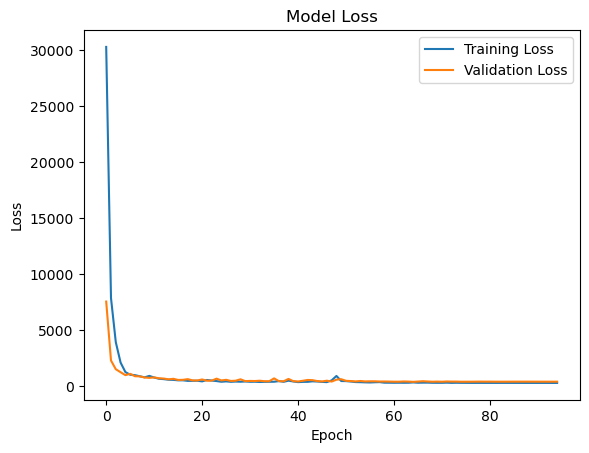

In [14]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Final Neural Network Test Set Performance:
R²: 0.9631, MSE: 357.4923, RMSE: 18.9075, MAE: 13.1048, 


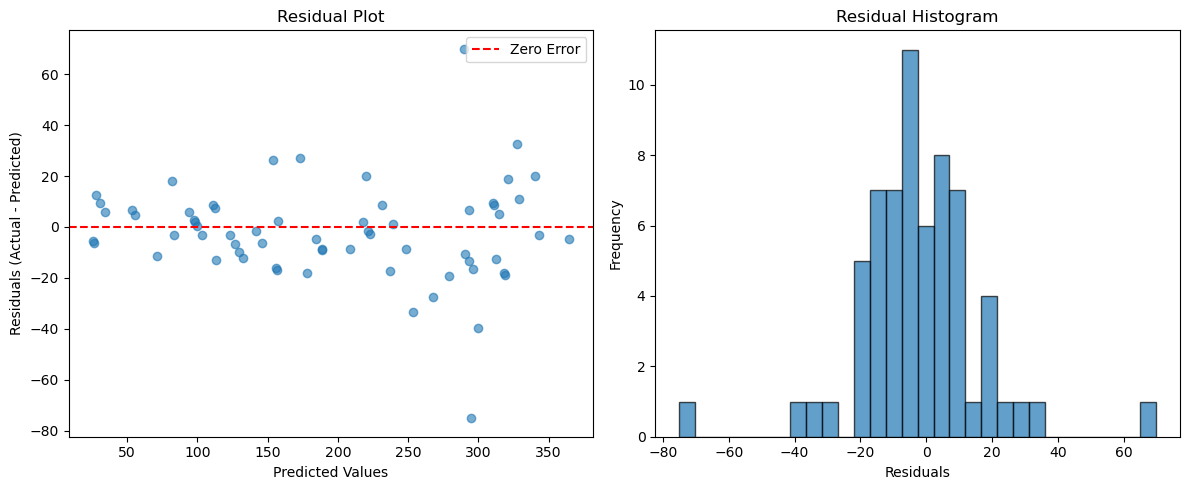

In [15]:
# Evaluate on the test set
y_test_pred = nn.predict(X_test_scaled)
r2  = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print("\nFinal Neural Network Test Set Performance:")
print(f"R²: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, ")

# Compute residuals: ensure y_test_pred is a 1D array
residuals = y_test - y_test_pred.flatten()

plt.figure(figsize=(12, 5))

# Residual scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.legend()

# Residual histogram
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")

plt.tight_layout()
plt.show()

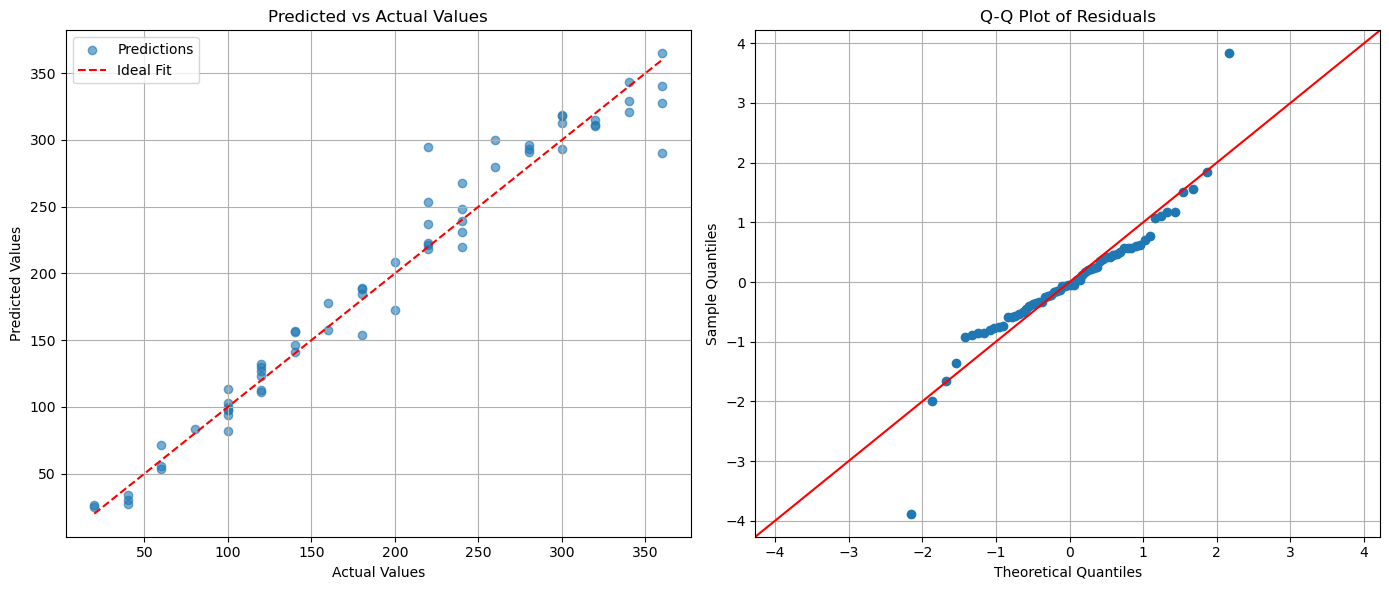

In [16]:
import statsmodels.api as sm

# Ensure y_test_pred is 1D
y_pred = y_test_pred.flatten()

# Compute residuals
residuals = y_test - y_pred

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 1. Predicted vs Actual (Parity) Plot on the first subplot
axs[0].scatter(y_test, y_pred, alpha=0.6, label="Predictions")
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
axs[0].set_xlabel("Actual Values")
axs[0].set_ylabel("Predicted Values")
axs[0].set_title("Predicted vs Actual Values")
axs[0].legend()
axs[0].grid(True)

# 2. Q-Q Plot of the residuals on the second subplot
sm.qqplot(residuals, line='45', fit=True, ax=axs[1])
axs[1].set_title("Q-Q Plot of Residuals")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [17]:
# Define the search grid ranges
layer_height_range = np.linspace(5, 15, num=5)
layer_width_range  = np.linspace(20, 40, num=5)
extrusion_values   = [5, 10]

# Create the Cartesian product
grid = list(product(extrusion_values, layer_height_range, layer_width_range))
search_grid = pd.DataFrame(grid, columns=['extrusion', 'layer_height', 'layer_width'])

# Scale the grid data using the final scaler
search_grid_scaled = scaler.transform(search_grid)

# Predict speed with the final NN model
grid_predictions = nn.predict(search_grid_scaled)
search_grid['speed'] = np.round(grid_predictions).astype(int)

print("\nSample of Grid Search Predictions:")
print(search_grid.head())

# # Optionally, save the results
# model_name = '3dcp_model'
# search_grid.to_csv(model_name + '_validation_experiment.csv', index=False)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Sample of Grid Search Predictions:
   extrusion  layer_height  layer_width  speed
0          5           5.0         20.0    333
1          5           5.0         25.0    257
2          5           5.0         30.0    195
3          5           5.0         35.0    162
4          5           5.0         40.0    133


In [18]:
def analytical_model(f, w, h):
    """
    Computes the analytical model:

        v = (f * 10^6) / [60 * (w*h - h^2 + (h^2 * pi)/4 )]

    where:
        f is speed (frequency) in some appropriate units,
        w is width,
        h is height.

    Returns a scalar value of v.
    """
    return (f * 1e6) / (60 * (w*h - h**2 + (h**2 * np.pi)/4))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/anaconda3/envs/ml-metal/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml-metal/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/ml-metal/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml-metal/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml-metal/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/ml-metal/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml-metal/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml-metal/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


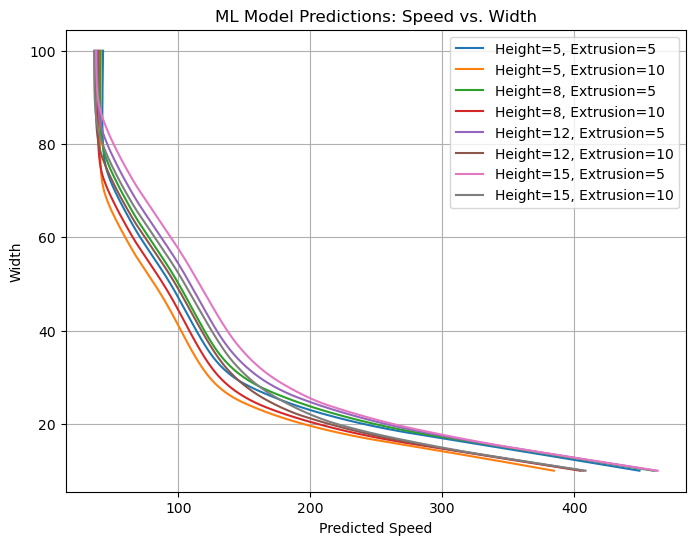

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_speed_vs_width(
    nn_model,
    scaler,
    heights=[5, 8, 12, 15],
    extrusions=[5, 10],
    w_min=15,
    w_max=75,
    w_points=50
):
    """
    For each combination of height and extrusion, this function calculates the predicted speed
    for a linear range of widths (w_min to w_max) and plots the resulting curve with:
      - x-axis: Predicted Speed
      - y-axis: Width

    Parameters:
    -----------
    nn_model   : Trained ML model that predicts speed given inputs [height, width, extrusion].
    scaler     : Fitted scaler (e.g., RobustScaler) used for input preprocessing.
    heights    : List of height values (e.g., [5, 8, 12, 15]).
    extrusions : List of extrusion speed values (e.g., [5, 10]).
    w_min      : Minimum width value.
    w_max      : Maximum width value.
    w_points   : Number of width points to generate between w_min and w_max.
    """
    # Generate a linear space for width
    widths = np.linspace(w_min, w_max, w_points)
    
    plt.figure(figsize=(8, 6))
    
    # Loop over each height and extrusion speed
    for h in heights:
        for e in extrusions:
            # Build input array: columns are [height, width, extrusion]
            # Make sure the order matches the training data!
            X = np.column_stack([
                np.full_like(widths, h),   # constant height
                widths,                    # varying width
                np.full_like(widths, e)    # constant extrusion speed
            ])

            # Scale the inputs
            X_scaled = scaler.transform(X)

            # Get predicted speeds from the ML model
            # (Assuming model returns a 2D array with one output per sample)
            predicted_speed = nn_model.predict(X_scaled).flatten()

            # Plot: x-axis is predicted speed, y-axis is width
            label_str = f"Height={h}, Extrusion={e}"
            plt.plot(predicted_speed, widths, label=label_str)

    plt.xlabel("Predicted Speed")
    plt.ylabel("Width")
    plt.title("ML Model Predictions: Speed vs. Width")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_speed_vs_width(
    nn_model=nn,
    scaler=scaler,
    heights=[5, 8, 12, 15],
    extrusions=[5, 10],
    w_min=10,
    w_max=100,
    w_points=1000
)